Filtering, imputing and summarizing our data set in various ways and so preparing it for distinct ways of modeling.

In [17]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from bsmcalls import individuals
from bsmcalls import preprocessing
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import statsmodels.api as sm
import patsy
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import and filter

In [11]:
calls, clin = individuals.get_data(merge=False, cleancalls=False, cols2drop=[])

Number of missing values

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3301 entries, ('CMC_MSSM_027', 'NeuN_pl', '1', 11973569, 'C->T') to ('CMC_PITT_118', 'NeuN_pl', 'X', 120533592, 'C->A')
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   REF                   3301 non-null   category
 1   ALT                   3301 non-null   category
 2   QUAL                  3301 non-null   float64 
 3   FILTER/PASS           3301 non-null   category
 4   FILTER/HC             3301 non-null   category
 5   FILTER/EXT            3301 non-null   category
 6   AC                    3301 non-null   int64   
 7   AF                    3301 non-null   float64 
 8   AN                    3301 non-null   int64   
 9   BaseQRankSum          3301 non-null   float64 
 10  DP                    3301 non-null   int64   
 11  DS                    0 non-null      float64 
 12  END                   0 non-null      float64 
 13  ExcessHet   

In [13]:
clin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, CMC_MSSM_215 to CMC_MSSM_379
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Institution              85 non-null     category
 1   Reported Gender          85 non-null     category
 2   Sex                      85 non-null     category
 3   Ethnicity                85 non-null     category
 4   ageOfDeath               85 non-null     float64 
 5   Brain Weight (in grams)  84 non-null     float64 
 6   PMI (in hours)           85 non-null     float64 
 7   Dx                       85 non-null     category
 8   Year of Autopsy          85 non-null     float64 
 9   Benzodiazepines          85 non-null     category
 10  Anticonvulsants          85 non-null     category
 11  AntipsychTyp             85 non-null     category
 12  AntipsychAtyp            85 non-null     category
 13  Antidepress              85 non-null     category
 

Let's look for degenerate variables (those with zero or nearly zero variance)

In [14]:
calls.var().dropna().sort_values()

POSITIVE_TRAIN_SITE         0.000000
AN                          0.000000
NEGATIVE_TRAIN_SITE         0.000000
MQ                          0.000114
MLEAF                       0.007958
AF                          0.008255
MQRankSum                   0.020727
evolConstrain               0.043113
SOR                         0.352119
SiPhyBranchLen              0.563445
ReadPosRankSum              1.241729
SiPhyLOD                    2.158784
GWASpval                    5.674950
BaseQRankSum                6.585335
QD                         11.829242
FS                         16.443418
szdbCNVcount               16.805045
MLEAC                      19.896250
AC                         20.636305
VQSLOD                     27.065752
DP                       7671.930013
QUAL                   734156.068346
dtype: float64

`AN` has zero sample variance.  `MQ` and `MQRankSum` have nearly zero sample variance.  Remove them!

## Filtered, merged data

In [21]:
calls1, clin1 = individuals.get_data(merge=False, cleancalls=False, cols2drop=[])

## Correlations between call based variables

First turn factors to dummy variables and then calculate the correlation matrix.  For simplicity we treat `object` type variables as factors and not binary $\{0, 1\}$ valued categorical variables.

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ebc499a90>)

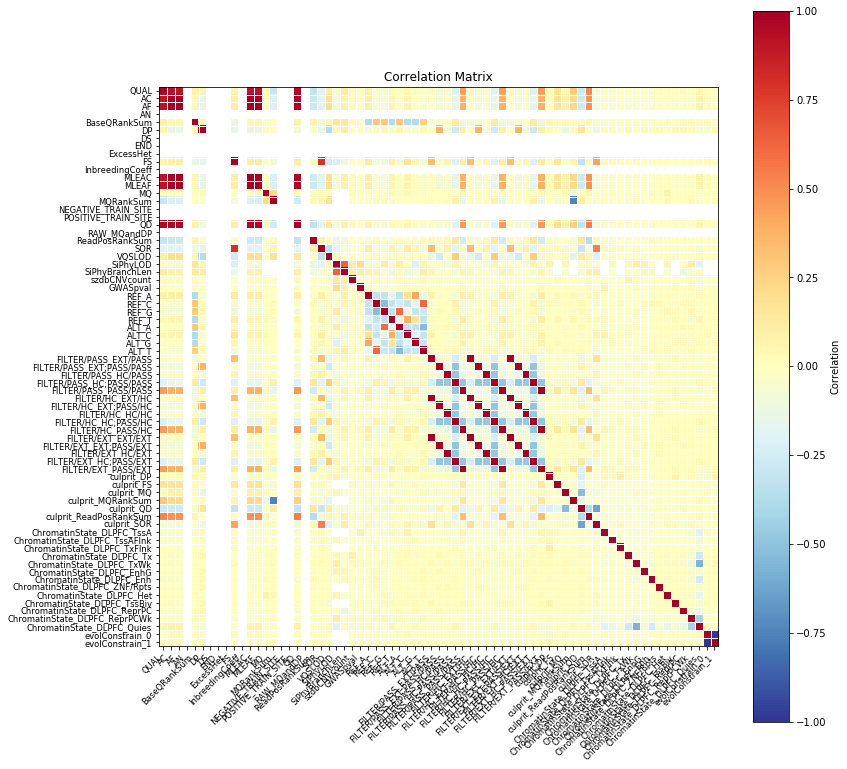

In [24]:
calls1num = preprocessing.dummify_df(calls1)
def corrmatplot(dfnum):
    corrmat = dfnum.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    sm.graphics.plot_corr(corrmat, ax=ax, xnames=dfnum.columns, ynames=dfnum.columns)
    cb = plt.colorbar(ax.get_images()[0])
    cb.set_label('Correlation')
    return((fig, ax))

corrmatplot(calls1num)

## Correlations between call based and clinical variables

Here we use `bsmcalls.individuals.get_data` with `cleancalls=True`, which removes the following redundant and degenerate variables from the calls (compare with plot above).

In [28]:
redundant_vars = ['FILTER/HC', 'FILTER/EXT', 'QUAL', 'AC', 'MLEAC', 'MLEAF', 'QD']
degenerate_vars = ['AN', 'MQ', 'MQRankSum']

In [25]:
calls2 = individuals.get_data(merge=True, cleancalls=True, cols2drop=[])

(<Figure size 864x864 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ebefcc090>)

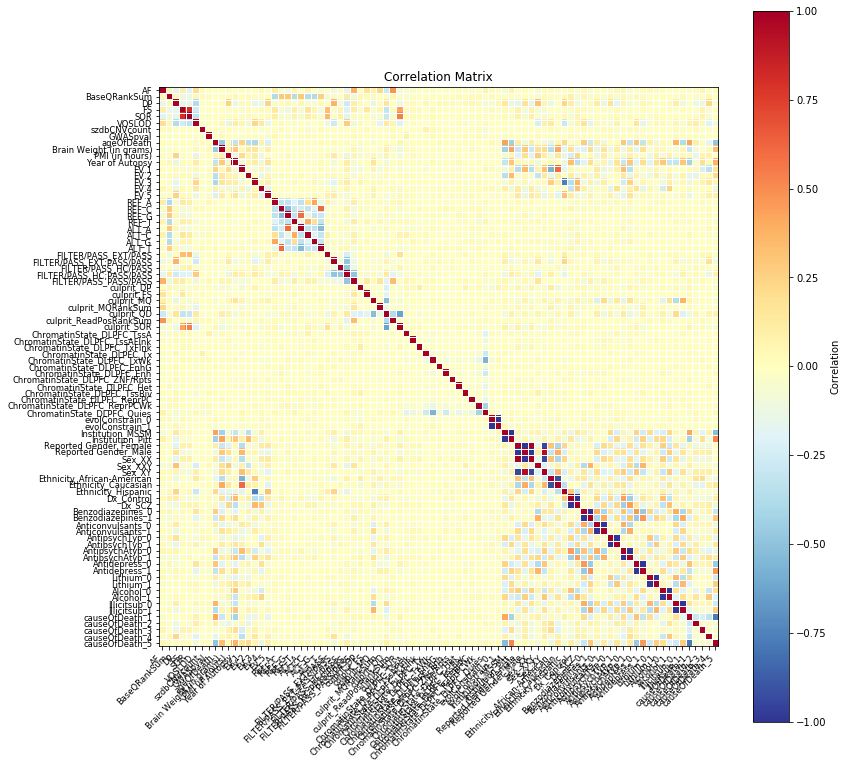

In [27]:
calls2num = preprocessing.dummify_df(calls2)
corrmatplot(calls2num)

The only strong correlation that stands out is between *Sex* and *Reported Gender*.  Removing *Sex* has been automated by adding `cols2drop=['Sex']` default argument to `bsmcalls.individuals.get_data`

In [20]:
%connect_info

{
  "shell_port": 52307,
  "iopub_port": 43317,
  "stdin_port": 44423,
  "control_port": 42135,
  "hb_port": 58025,
  "ip": "127.0.0.1",
  "key": "38103903-d5a0b5f22579afa103ab7abe",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-0e187580-28f5-4b25-915e-0d7f145d4843.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
